<a href="https://colab.research.google.com/github/luferIPCA/MIA-MLA-24-25/blob/main/4_Data_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part II

**Contents**:

1.  **Data Correlation**



## Environment preparation


### Importing necessary Libraries

In [ ]:
#!pip install pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from pandas_profiling import ProfileRepor   #see https://www.kaggle.com/discussions/general/233785
from scipy import stats

Mounting Drive

In [2]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [3]:
import os
print(os.getcwd())

/content


## 1 - Correlations in Dataset

Essential Data Correlations  using Pandas *corr()*

### **Example 1:** Heart Disease

*Loading dataset*

In [8]:

import os
#print(os.getcwd())

filePath='/content/gDrive/MyDrive/Colab Notebooks/MIA - ML - 2024-2025/Datasets/'
ds = pd.read_csv(filePath+"heart-disease.csv")
pd.set_option("display.precision", 2)

In [ ]:
ds.head()
#len(ds)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


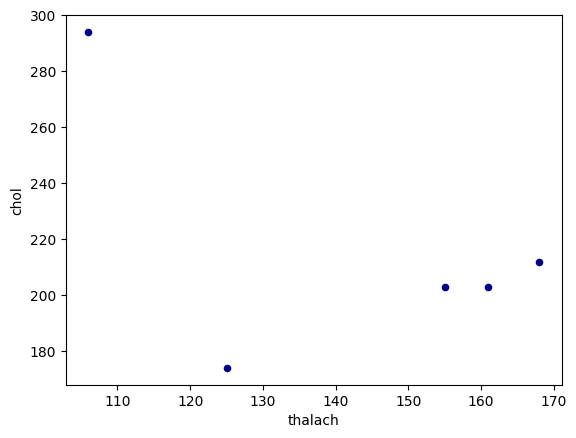

In [9]:
#Example of correlation distribution
ax1 = ds.head().plot.scatter(x='thalach',
                      y='chol',
                      c='DarkBlue')

***Correlation distribution***

In [10]:
#corr() calculate variables correlations
print(ds.corr())
# Answer
# Strong negative correlation example: between thal thalach

           age   sex    cp  trestbps  chol       fbs  restecg   thalach  \
age       1.00 -0.10 -0.07      0.27  0.22  1.21e-01    -0.13 -3.90e-01   
sex      -0.10  1.00 -0.04     -0.08 -0.20  2.72e-02    -0.06 -4.94e-02   
cp       -0.07 -0.04  1.00      0.04 -0.08  7.93e-02     0.04  3.07e-01   
trestbps  0.27 -0.08  0.04      1.00  0.13  1.82e-01    -0.12 -3.93e-02   
chol      0.22 -0.20 -0.08      0.13  1.00  2.69e-02    -0.15 -2.18e-02   
fbs       0.12  0.03  0.08      0.18  0.03  1.00e+00    -0.10 -8.87e-03   
restecg  -0.13 -0.06  0.04     -0.12 -0.15 -1.04e-01     1.00  4.84e-02   
thalach  -0.39 -0.05  0.31     -0.04 -0.02 -8.87e-03     0.05  1.00e+00   
exang     0.09  0.14 -0.40      0.06  0.07  4.93e-02    -0.07 -3.80e-01   
oldpeak   0.21  0.08 -0.17      0.19  0.06  1.09e-02    -0.05 -3.50e-01   
slope    -0.17 -0.03  0.13     -0.12 -0.01 -6.19e-02     0.09  3.95e-01   
ca        0.27  0.11 -0.18      0.10  0.07  1.37e-01    -0.08 -2.08e-01   
thal      0.07  0.20 -0.1

***Correlation Matrix with Seaborn***

<Axes: >

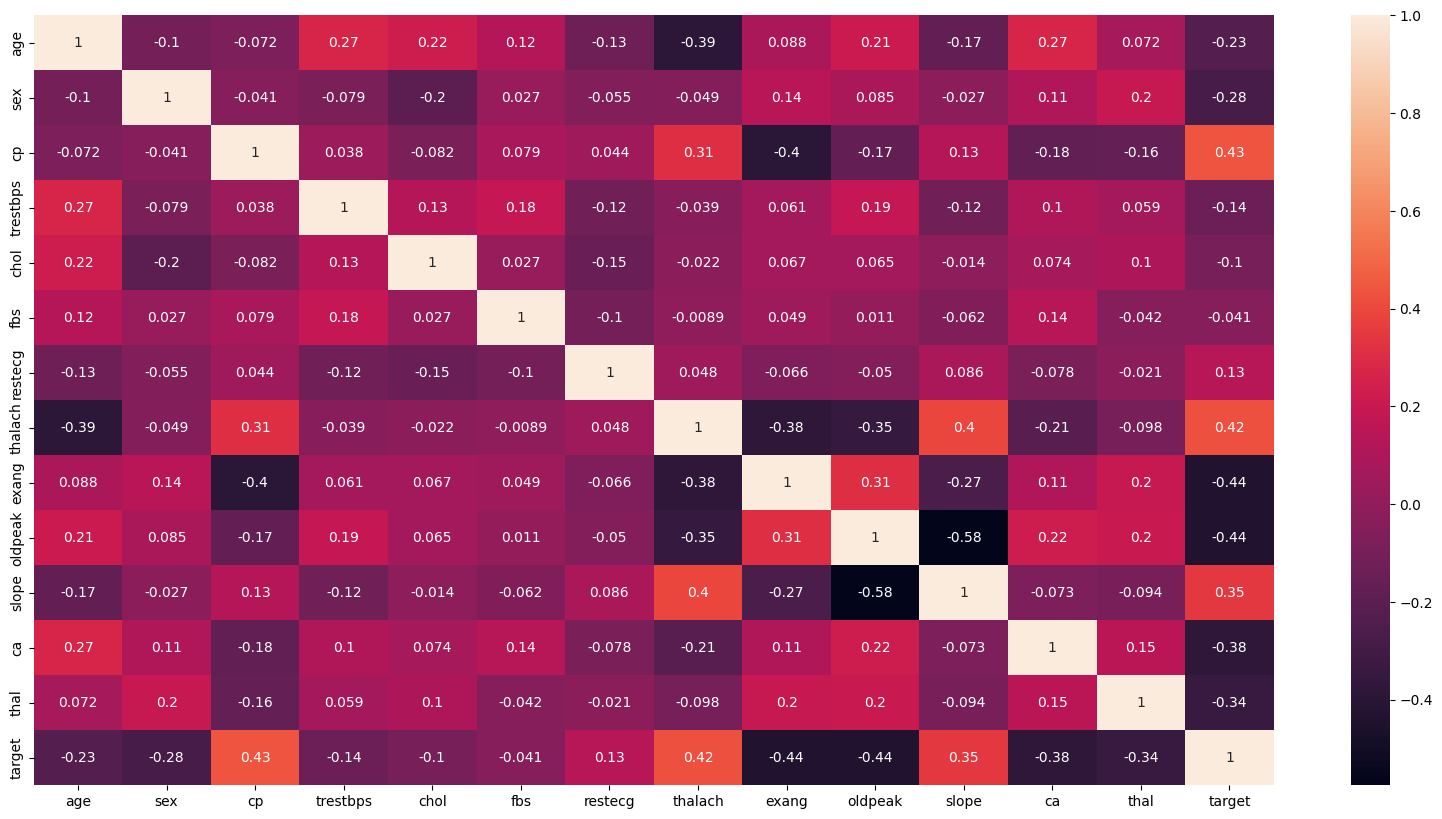

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(ds.corr(),  annot=True)

***Dataframe Correlation using Pearson r***

In [12]:
# To find the correlation among all columns using pearson method
ds.corr(method='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,1.21e-01,-0.13,-3.90e-01,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,2.72e-02,-0.06,-4.94e-02,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,7.93e-02,0.04,3.07e-01,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,1.82e-01,-0.12,-3.93e-02,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,2.69e-02,-0.15,-2.18e-02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00e+00,-0.10,-8.87e-03,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-1.04e-01,1.00,4.84e-02,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-8.87e-03,0.05,1.00e+00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,4.93e-02,-0.07,-3.80e-01,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,1.09e-02,-0.05,-3.50e-01,0.31,1.00,-0.58,0.22,0.20,-0.44


***Dataframe Correlation using Kendal p***

In [13]:
# To find the correlation among all columns using kendall method
ds.corr(method='kendall')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.09,-0.07,0.20,0.14,0.09,-0.12,-0.27,0.06,0.19,-0.14,0.27,0.07,-0.20
sex,-0.09,1.00,-0.05,-0.06,-0.13,0.03,-0.04,-0.04,0.14,0.08,-0.02,0.11,0.23,-0.28
cp,-0.07,-0.05,1.00,0.02,-0.07,0.07,0.06,0.26,-0.40,-0.15,0.15,-0.19,-0.19,0.43
trestbps,0.20,-0.06,0.02,1.00,0.09,0.13,-0.11,-0.02,0.04,0.10,-0.07,0.07,0.05,-0.10
chol,0.14,-0.13,-0.07,0.09,1.00,0.03,-0.13,-0.04,0.07,0.04,-0.02,0.09,0.07,-0.11
fbs,0.09,0.03,0.07,0.13,0.03,1.00,-0.10,-0.01,0.05,0.03,-0.05,0.13,-0.01,-0.04
restecg,-0.12,-0.04,0.06,-0.11,-0.13,-0.10,1.00,0.08,-0.07,-0.06,0.11,-0.10,-0.02,0.15
thalach,-0.27,-0.04,0.26,-0.02,-0.04,-0.01,0.08,1.00,-0.33,-0.31,0.35,-0.20,-0.13,0.35
exang,0.06,0.14,-0.40,0.04,0.07,0.05,-0.07,-0.33,1.00,0.28,-0.27,0.15,0.23,-0.44
oldpeak,0.19,0.08,-0.15,0.10,0.04,0.03,-0.06,-0.31,0.28,1.00,-0.51,0.19,0.21,-0.38


### **Example 2:** Students and Classes

*Loading dataset*

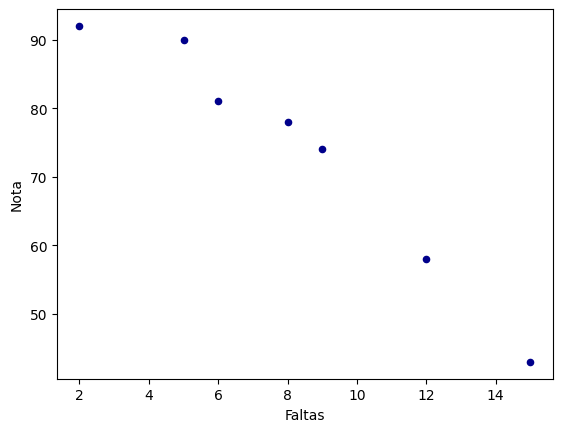

In [18]:
# students and Classes
df = {
    "Faltas": [8, 2, 5, 12, 15, 9, 6],
    "Nota": [78,92,90,58,43,74,81]
}

data = pd.DataFrame(df)

ax1 = data.plot.scatter(x='Faltas',
                      y='Nota',
                      c='DarkBlue')

***Correlation distribution***

In [20]:
# Calculate the Pearson correlation
correlation = data["Faltas"].corr(data["Nota"])
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: -0.9747632142351275


In [15]:
#corr() calculate variables correlations using Person method, by default!
print(data.corr())
# Answer
# Strong negative correlation

        Faltas  Nota
Faltas    1.00 -0.97
Nota     -0.97  1.00


In [22]:
# Calculate the Kendall correlation
kendall_correlation = data["Faltas"].corr(data["Nota"], method='kendall')
print(f"Kendall Correlation: {kendall_correlation}")

Kendall Correlation: -1.0


In [23]:
# Calculate the Spearman correlation
spearman_correlation = data["Faltas"].corr(data["Nota"], method='spearman')
print(f"Spearman Correlation: {spearman_correlation}")

Spearman Correlation: -1.0


***Visualizing correlations with Seaborn***

<Axes: >

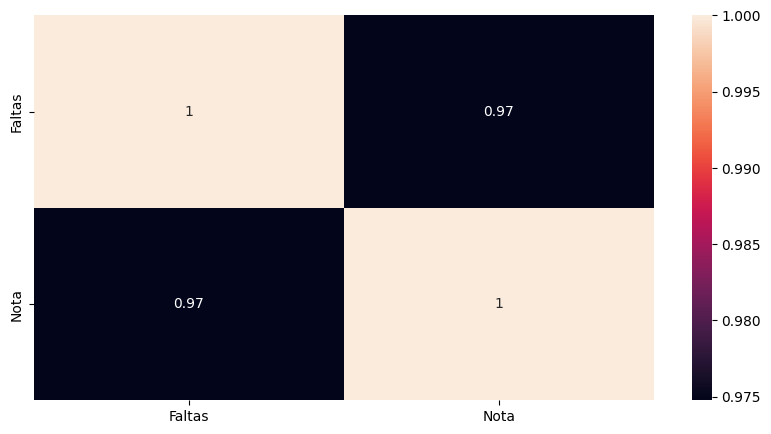

In [16]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr().abs(),  annot=True)

\
### **Example 3:** - Games and Points

*Loading dataset*

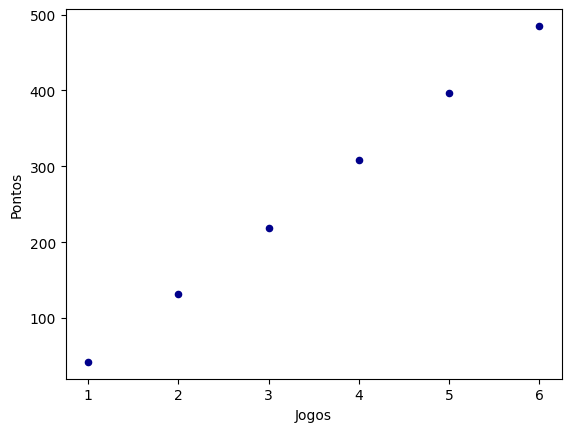

In [26]:
# students and Classes
df = {
    "Jogos": [1, 2, 3, 4, 5, 6],
    "Pontos": [42,131,219,308,396,485]
}

data = pd.DataFrame(df)

ax1 = data.plot.scatter(x='Jogos',
                      y='Pontos',
                      c='DarkBlue')

***Using Seaborn Heatmap***


<Axes: >

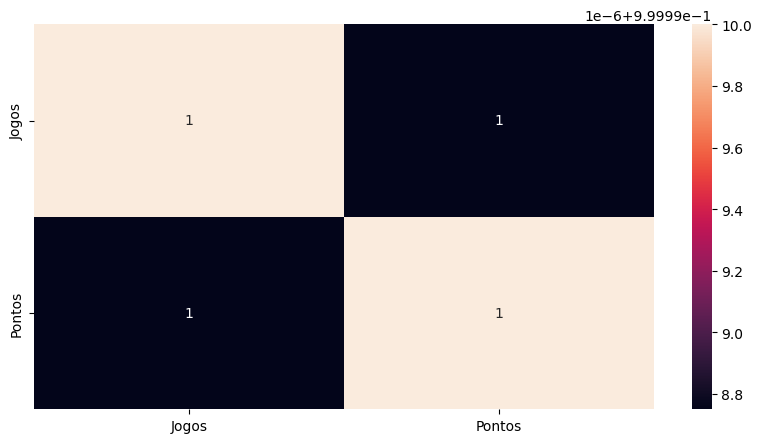

In [27]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(),  annot=True)

***Persons r Using Correlation Matrix***

In [24]:
#corr() calculate variables correlations
correlation_pearson = data.corr()
correlation_pearson
# Answer
# Strong positive correlation

,Faltas,Nota
Faltas,1.00,-0.97
Nota,-0.97,1.00


***Spearman t Correlation***

In [25]:
# Calcula a correlação de Spearman
correlation_spearman = data.corr(method='spearman')
correlation_spearman

,Faltas,Nota
Faltas,1.0,-1.0
Nota,-1.0,1.0



\


### ***Example 4: - Boston House***

See [Boston House Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)



In [29]:

ds2 = pd.read_csv(filePath+"BostonHousing.csv")
pd.set_option("display.precision", 2)

In [30]:
ds2.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2


In [31]:
# how many numerical features
ds2.select_dtypes(include=np.number).columns
#answer
#none! all features are numerical

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [32]:
ds2.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [33]:
#select only the numeric columns in the DataFrame
ds2.select_dtypes(include=np.number)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.26e-02,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4
502,4.53e-02,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6
503,6.08e-02,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9
504,1.10e-01,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0


In [34]:
#check features types
# Checking values
result = ds2.applymap(np.isreal)

# Display result
print("Result:\n",result)
#true means numerical
#false means non numerical

Result:
      crim    zn  indus  chas   nox    rm   age   dis   rad   tax  ptratio  \
0    True  True   True  True  True  True  True  True  True  True     True   
1    True  True   True  True  True  True  True  True  True  True     True   
2    True  True   True  True  True  True  True  True  True  True     True   
3    True  True   True  True  True  True  True  True  True  True     True   
4    True  True   True  True  True  True  True  True  True  True     True   
..    ...   ...    ...   ...   ...   ...   ...   ...   ...   ...      ...   
501  True  True   True  True  True  True  True  True  True  True     True   
502  True  True   True  True  True  True  True  True  True  True     True   
503  True  True   True  True  True  True  True  True  True  True     True   
504  True  True   True  True  True  True  True  True  True  True     True   
505  True  True   True  True  True  True  True  True  True  True     True   

        b  lstat  medv  
0    True   True  True  
1    True   True

<ipython-input-34-31afcc6fbfc3>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = ds2.applymap(np.isreal)


Correlation Matrix

<Axes: >

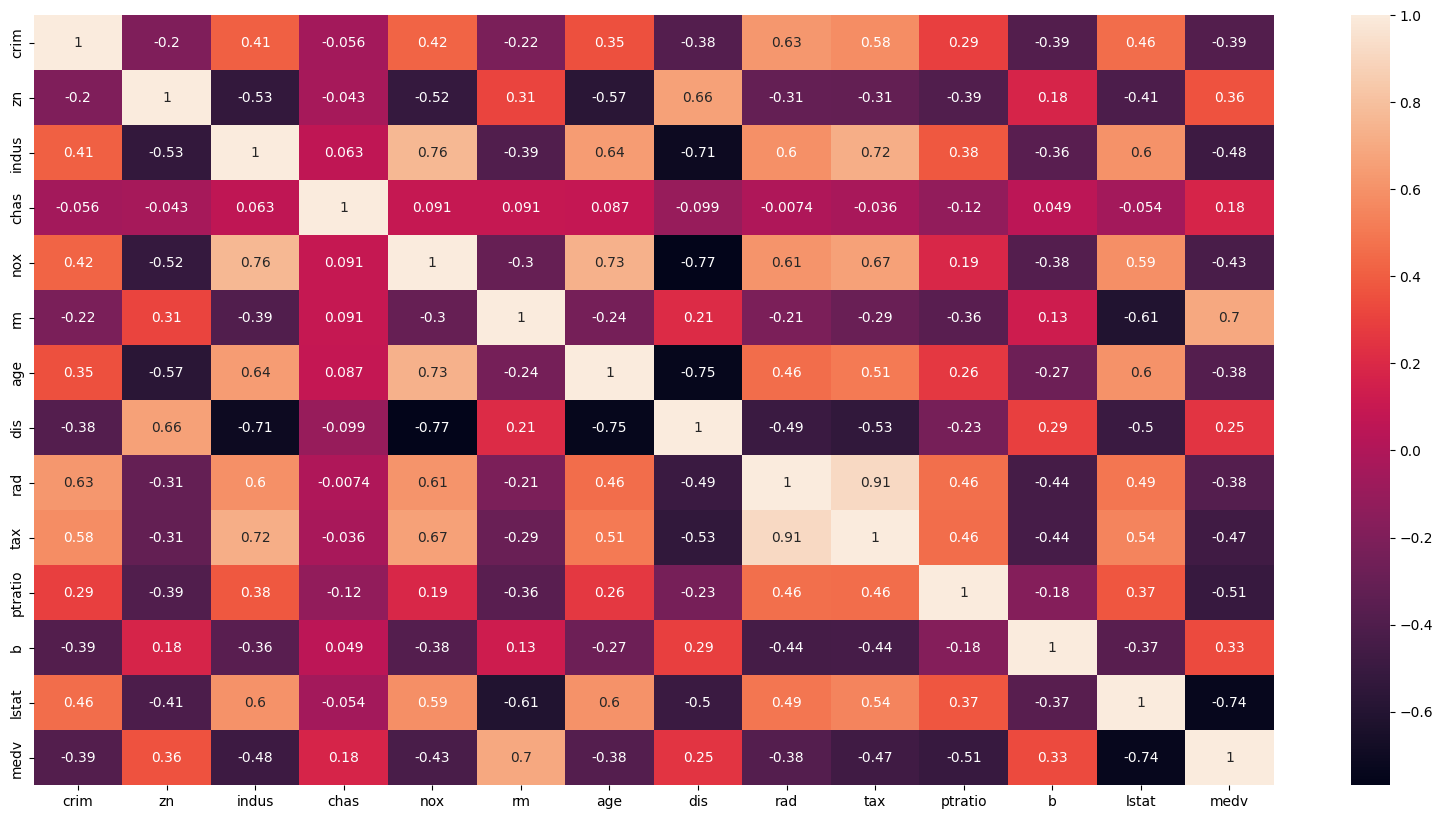

In [35]:
#get correlations
plt.figure(figsize=(20, 10))
sns.heatmap(ds2.corr(),  annot=True)



*   “tax” and “rad” columns are highly correlated with a value of 0.92 (positive correlation).
*   The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors

## 2 - Selecting Features

What feature to exclude for training?

In [41]:
import pandas as pd

# Extend the DataFrame with new features
data = {
    "Faltas": [8, 2, 5, 12, 15, 9, 6],
    "Nota": [78, 92, 90, 58, 43, 74, 81],
    "Estudo": [10, 25, 20, 5, 3, 15, 18],
    "Participação": [80, 95, 90, 50, 40, 75, 85]
}

df = pd.DataFrame(data)
print(df)

   Faltas  Nota  Estudo  Participação
0       8    78      10            80
1       2    92      25            95
2       5    90      20            90
3      12    58       5            50
4      15    43       3            40
5       9    74      15            75
6       6    81      18            85


Compute Correlation Matrix

In [43]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Faltas  Nota  Estudo  Participação
Faltas          1.00 -0.97   -0.96         -0.97
Nota           -0.97  1.00    0.93          0.99
Estudo         -0.96  0.93    1.00          0.93
Participação   -0.97  0.99    0.93          1.00


 Select Feature to Exclude

 * Look for features with weak correlations with the target variable (Nota) or high correlations with other features (redundancy).

* Visualize the correlations using a heatmap (optional, with libraries like seaborn).

In [49]:
correlation_matrix["Nota"].idxmin()

'Faltas'

In [38]:
# Find the feature with the weakest correlation with 'Nota'
correlations_with_nota = correlation_matrix["Nota"].drop("Nota")
feature_to_exclude = correlations_with_nota.idxmin()

print(f"The feature to exclude is: {feature_to_exclude}")

The feature to exclude is: Faltas


Visualizing

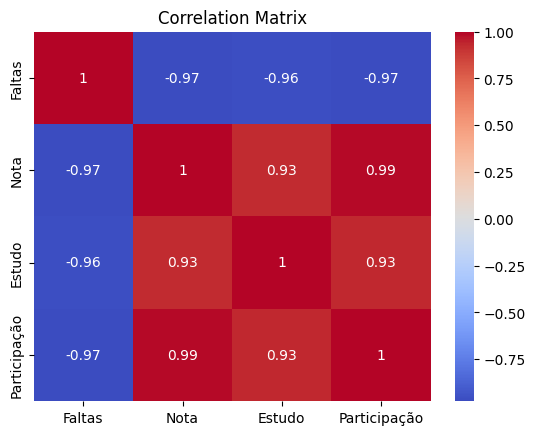

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Exclude the selected feature

In [51]:
# Drop the feature from the DataFrame
df_reduced = df.drop(columns=[feature_to_exclude])
#or
#df_reduced = df.drop(feature_to_exclude,axis=1)
print(df_reduced)

   Nota  Estudo  Participação
0    78      10            80
1    92      25            95
2    90      20            90
3    58       5            50
4    43       3            40
5    74      15            75
6    81      18            85


End!